In [15]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
df = pd.read_csv('../data/tweets_final.csv')
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,NaN,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en


In [4]:
df['location'] = df['location'].fillna('Unknown')
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en


In [5]:
### Data Cleaning 

# Dropping non english tweets.

df.drop(df[(df['language'] != 'en')].index, inplace=True)
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en


In [11]:
def format_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound']>= 0.05):
    polarity = "positive"

  elif(output_dict['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  output_dict =  sent_analyzer.polarity_scores(text)
  return format_output(output_dict)

def predict_polarity(text):
  
  output_dict =  sent_analyzer.polarity_scores(text)
  return output_dict

# Run the predictions
df["vader_prediction"] = df["tweet"].apply(predict_sentiment)
df["vader_polarity"] = df["tweet"].apply(predict_polarity)

# Show 5 random rows of the data
df.sample(5)

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language,vader_prediction,vader_polarity
3371,3371,2022-11-07 23:56:49+00:00,1589768870751272961,"Washington, DC","I voted today! \n\nIt may not seem like it, bu...",64,19,en,positive,"{'neg': 0.033, 'neu': 0.875, 'pos': 0.092, 'co..."
9969,9969,2022-11-07 23:50:36+00:00,1589767305952886784,Upstate New York.,@matjendav4 @Mike_Pence @RepLeeZeldin One day ...,0,0,en,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2625,2625,2022-11-07 23:57:33+00:00,1589769055610998786,Unknown,@pink_nylon @hannah_chaddha If there are many ...,12,0,en,positive,"{'neg': 0.097, 'neu': 0.697, 'pos': 0.206, 'co..."
3830,3830,2022-11-07 23:56:23+00:00,1589768758675243008,"Orange County, CA","@julie_kelly2 TRUMP is scum. The corrupt, chea...",0,0,en,negative,"{'neg': 0.265, 'neu': 0.622, 'pos': 0.113, 'co..."
3754,3754,2022-11-07 23:56:28+00:00,1589768778828877824,Unknown,@btsvote_tr I'm voting for #YetToCome as #TheM...,0,0,en,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [8]:
sentiments = df['vader_prediction'].value_counts()
sentiments

positive    8143
negative    5449
neutral     5094
Name: vader_prediction, dtype: int64

([<matplotlib.patches.Wedge at 0x1b7cbc39fd0>,
 [Text(-1.099592584521943, 0.02993573223347142, 'Neutral'),
  Text(0.6977680541572018, -0.8503644763262824, 'Positive'),
  Text(0.6932947240636452, 0.8540154715141374, 'Negative')],
 [Text(-0.5997777733756051, 0.016328581218257136, '43.6%'),
  Text(0.3806007568130191, -0.4638351689052449, '29.2%'),
  Text(0.37816075858017006, 0.46582662082589305, '27.3%')])

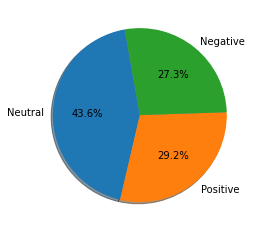

In [10]:
labels = ['Neutral', 'Positive', 'Negative']
fig1, ax1 = plt.subplots()
ax1.pie(sentiments, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100)

In [12]:
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language,vader_prediction,vader_polarity
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en,positive,"{'neg': 0.062, 'neu': 0.626, 'pos': 0.313, 'co..."
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en,positive,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound..."
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en,negative,"{'neg': 0.118, 'neu': 0.812, 'pos': 0.07, 'com..."
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en,positive,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp..."
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en,negative,"{'neg': 0.214, 'neu': 0.68, 'pos': 0.107, 'com..."


In [16]:
# function to clean all data
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    # make text lowercase
    text = text.lower()
    # removing text within brackets
    text = re.sub('\[.*?\]', '', text)
    # removing text within parentheses
    text = re.sub('\(.*?\)', '', text)
    # removing numbers
    text = re.sub('\w*\d\w*', '', text)
    # if there's more than 1 whitespace, then make it just 1
    text = re.sub('\s+', ' ', text)
    # if there's a new line, then make it a whitespace
    text = re.sub('\n', ' ', text)
    # removing any quotes
    text = re.sub('\"+', '', text)
    # removing &
    text = re.sub('(\&amp\;)', '', text)
    # removing any usernames
    text = re.sub('(@[^\s]+)', '', text)
    # removing any hashtags
    text = re.sub('(#[^\s]+)', '', text)
    # remove `rt` for retweet
    text = re.sub('(rt)', '', text)
    # string.punctuation is a string of all punctuation marks
    # so this gets rid of all punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # getting rid of `httptco`
    text = re.sub('(httptco)', '', text)

    return text
    

In [17]:
df['cleaned_tweets'] = df['tweet'].apply(clean_text_round1)
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language,vader_prediction,vader_polarity,cleaned_tweets
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en,positive,"{'neg': 0.062, 'neu': 0.626, 'pos': 0.313, 'co...",taking into account personal contributions de...
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en,positive,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",whats your fav song ❥ i’m voting for at the
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en,negative,"{'neg': 0.118, 'neu': 0.812, 'pos': 0.07, 'com...",he is allowed to speak his opinion just like ...
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en,positive,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",hey ny district please vote for
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en,negative,"{'neg': 0.214, 'neu': 0.68, 'pos': 0.107, 'com...",vote blue no matter who 💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙


In [19]:
df["vader_CleanedTweets"] = df["cleaned_tweets"].apply(predict_sentiment)
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language,vader_prediction,vader_polarity,cleaned_tweets,vader_CleanedTweets
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en,positive,"{'neg': 0.062, 'neu': 0.626, 'pos': 0.313, 'co...",taking into account personal contributions de...,positive
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en,positive,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",whats your fav song ❥ i’m voting for at the,positive
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en,negative,"{'neg': 0.118, 'neu': 0.812, 'pos': 0.07, 'com...",he is allowed to speak his opinion just like ...,negative
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en,positive,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",hey ny district please vote for,positive
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en,negative,"{'neg': 0.214, 'neu': 0.68, 'pos': 0.107, 'com...",vote blue no matter who 💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙,negative


In [20]:
sentiments2 = df['vader_CleanedTweets'].value_counts()
sentiments2

positive    7676
negative    5741
neutral     5269
Name: vader_CleanedTweets, dtype: int64

In [21]:
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.collocations import *

In [22]:
# checking top words before removing stop words
# function to tokenize without removing stop words
def unfiltered_tokens(text):
    wordtokens = nltk.word_tokenize(text)
    return wordtokens

In [23]:
data = df['cleaned_tweets']

In [24]:
# applying this function to the `clean_tweets` column
unfilterd_data = list(map(unfiltered_tokens, data))

In [25]:
# morphing `unfiltered_data` into a readable list
flat_unfiltered = [item for sublist in unfilterd_data for item in sublist]

In [26]:
# getting frequency distribution
corpus_freqdist = FreqDist(flat_unfiltered)
# top 20 words in the corpus
corpus_freqdist.most_common(20)

[('the', 17619),
 ('to', 11024),
 ('vote', 9789),
 ('for', 9609),
 ('and', 7278),
 ('i', 6733),
 ('of', 6649),
 ('a', 6292),
 ('you', 6038),
 ('’', 5889),
 ('in', 5062),
 ('is', 4944),
 ('httpstco', 4585),
 ('voting', 4066),
 ('election', 3963),
 ('that', 3625),
 ('it', 3359),
 ('at', 3305),
 ('are', 3229),
 ('on', 2773)]

In [27]:
stop_words = set(stopwords.words('english'))
def process_tweet(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [28]:
# applying the above function to our data/features 
processed_data = list(map(process_tweet, data))

In [29]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

21388

In [30]:
# morphing `processed_data` into a readable list
flat_filtered = [item for sublist in processed_data for item in sublist]
# getting frequency distribution
clean_corpus_freqdist = FreqDist(flat_filtered)
# top 20 words in cleaned corpus
clean_corpus_freqdist.most_common(20)

[('vote', 9789),
 ('’', 5889),
 ('httpstco', 4585),
 ('voting', 4066),
 ('election', 3963),
 ('democrats', 2662),
 ('republican', 1966),
 ('people', 1827),
 ('tomorrow', 1525),
 ('year', 1276),
 ('im', 1236),
 ('like', 1108),
 ('day', 1099),
 ('get', 1093),
 ('pay', 999),
 ('favorite', 970),
 ('republicans', 953),
 ('red', 923),
 ('blue', 849),
 ('dont', 829)]

In [32]:
from nltk.tokenize import word_tokenize 
from emot.emo_unicode import UNICODE_EMOJI
emoji = list(UNICODE_EMOJI.keys())

def clean_stop_lemma(text):
    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]
    # lemmetizing words
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text

In [33]:
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language,vader_prediction,vader_polarity,cleaned_tweets,vader_CleanedTweets
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en,positive,"{'neg': 0.062, 'neu': 0.626, 'pos': 0.313, 'co...",taking into account personal contributions de...,positive
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en,positive,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",whats your fav song ❥ i’m voting for at the,positive
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en,negative,"{'neg': 0.118, 'neu': 0.812, 'pos': 0.07, 'com...",he is allowed to speak his opinion just like ...,negative
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en,positive,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",hey ny district please vote for,positive
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en,negative,"{'neg': 0.214, 'neu': 0.68, 'pos': 0.107, 'com...",vote blue no matter who 💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙,negative


In [34]:
df['clean_WithStopLemma'] = df['cleaned_tweets'].apply(clean_stop_lemma)

In [35]:
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language,vader_prediction,vader_polarity,cleaned_tweets,vader_CleanedTweets,clean_WithStopLemma
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en,positive,"{'neg': 0.062, 'neu': 0.626, 'pos': 0.313, 'co...",taking into account personal contributions de...,positive,taking account personal contribution degree ba...
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en,positive,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",whats your fav song ❥ i’m voting for at the,positive,whats fav song ❥ ’ voting
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en,negative,"{'neg': 0.118, 'neu': 0.812, 'pos': 0.07, 'com...",he is allowed to speak his opinion just like ...,negative,allowed speak opinion like rest u opinion vote...
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en,positive,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",hey ny district please vote for,positive,hey ny district please vote
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en,negative,"{'neg': 0.214, 'neu': 0.68, 'pos': 0.107, 'com...",vote blue no matter who 💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙,negative,vote blue matter 💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙


In [36]:
df["vader_w_SL"] = df["clean_WithStopLemma"].apply(predict_sentiment)
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language,vader_prediction,vader_polarity,cleaned_tweets,vader_CleanedTweets,clean_WithStopLemma,vader_w_SL
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en,positive,"{'neg': 0.062, 'neu': 0.626, 'pos': 0.313, 'co...",taking into account personal contributions de...,positive,taking account personal contribution degree ba...,positive
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en,positive,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",whats your fav song ❥ i’m voting for at the,positive,whats fav song ❥ ’ voting,positive
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en,negative,"{'neg': 0.118, 'neu': 0.812, 'pos': 0.07, 'com...",he is allowed to speak his opinion just like ...,negative,allowed speak opinion like rest u opinion vote...,negative
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en,positive,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",hey ny district please vote for,positive,hey ny district please vote,positive
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en,negative,"{'neg': 0.214, 'neu': 0.68, 'pos': 0.107, 'com...",vote blue no matter who 💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙,negative,vote blue matter 💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙🇺🇸💙,neutral


In [37]:
sentiments3 = df['vader_w_SL'].value_counts()
sentiments3

positive    7971
negative    5361
neutral     5354
Name: vader_w_SL, dtype: int64